In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import pearsonr,ttest_ind, f_oneway
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/netflix_movies (1).csv')


In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
data.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [7]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [8]:
data.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


from matplotlib import pyplot as plt
_df_0['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['release_year'].plot(kind='line', figsize=(8, 4), title='release_year')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
# Display basic info about the dataset
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [12]:
data.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [13]:
data.tail(8)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [20]:
#1.Find out which types of genre has most movies and TV Shows
# Split the 'listed_in' column by ',' and explode the genres

data['listed_in'] = data['listed_in'].fillna('Unknown')
exploded_genres = data.assign(genres=data['listed_in'].str.split(', ')).explode('genres')


In [21]:
# Count genres by type (Movies vs TV Shows)
genre_count = exploded_genres.groupby(['type', 'genres']).size().reset_index(name='count')


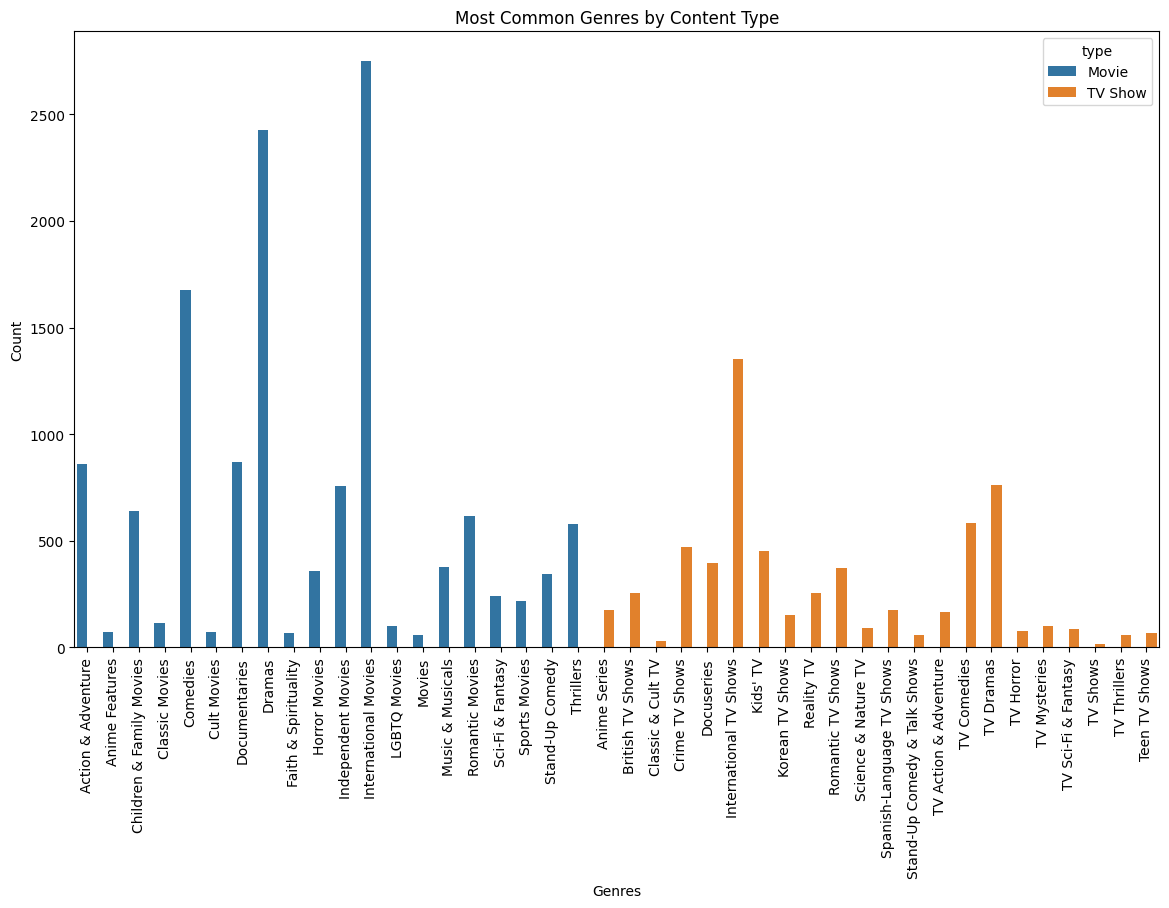

In [22]:
# Plot the genres

plt.figure(figsize=(14, 8))
sns.barplot(data=genre_count, x='genres', y='count', hue='type', dodge=True)
plt.xticks(rotation=90)
plt.title('Most Common Genres by Content Type')
plt.ylabel('Count')
plt.xlabel('Genres')
plt.show()

In [24]:
#2. What is the distribution of content types (e.g., Movies vs. TV Shows) in the dataset?

content_type_distribution = data['type'].value_counts()


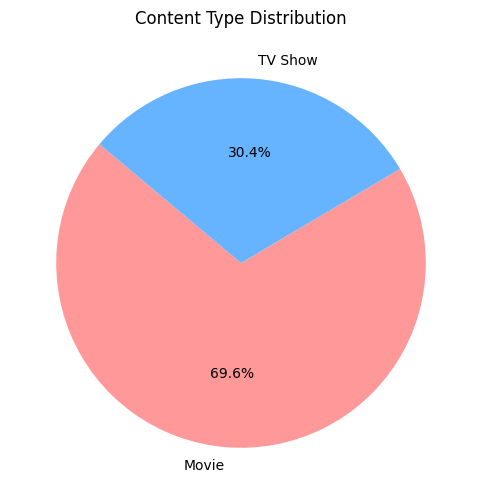

In [25]:
# Plot content type distribution

plt.figure(figsize=(6, 6))
content_type_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Content Type Distribution')
plt.ylabel('')
plt.show()


In [46]:
#3.Which countries contribute the most to the content library?
data['country'] = data['country'].fillna('Unknown')
country_count = data['country'].value_counts().head(15)


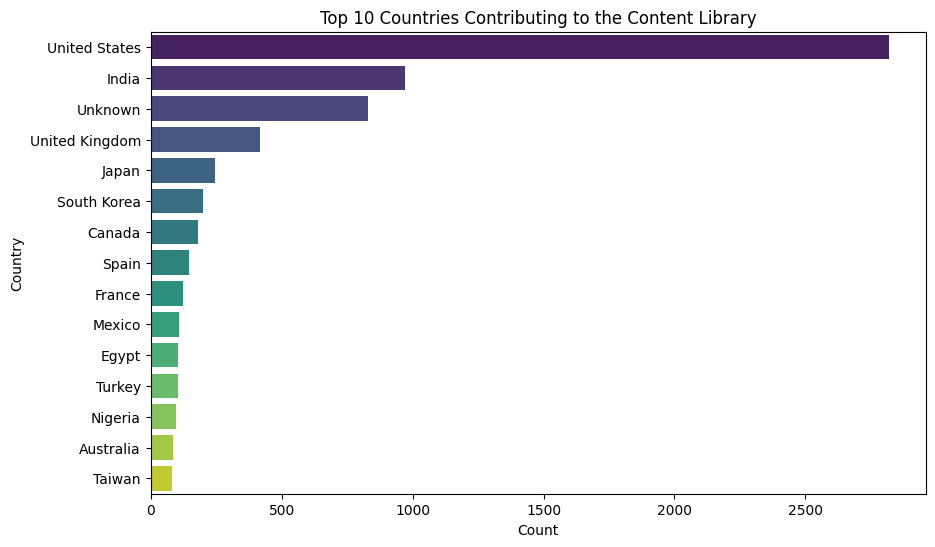

In [47]:
# Plot top 10 countries

plt.figure(figsize=(10, 6))
sns.barplot(x=country_count.values, y=country_count.index, palette='viridis')
plt.title('Top 10 Countries Contributing to the Content Library')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [50]:
#4.What is the average duration of movies, and how does it vary across different ratings?

# Filter movies and clean the 'duration' column
movies_data = data[data['type'] == 'Movie']
movies_data['duration'] = movies_data['duration'].str.replace(' min', '').fillna('0').astype(int)


In [49]:
# Group by rating and calculate the average duration
avg_duration_by_rating = movies_data.groupby('rating')['duration'].mean().reset_index()


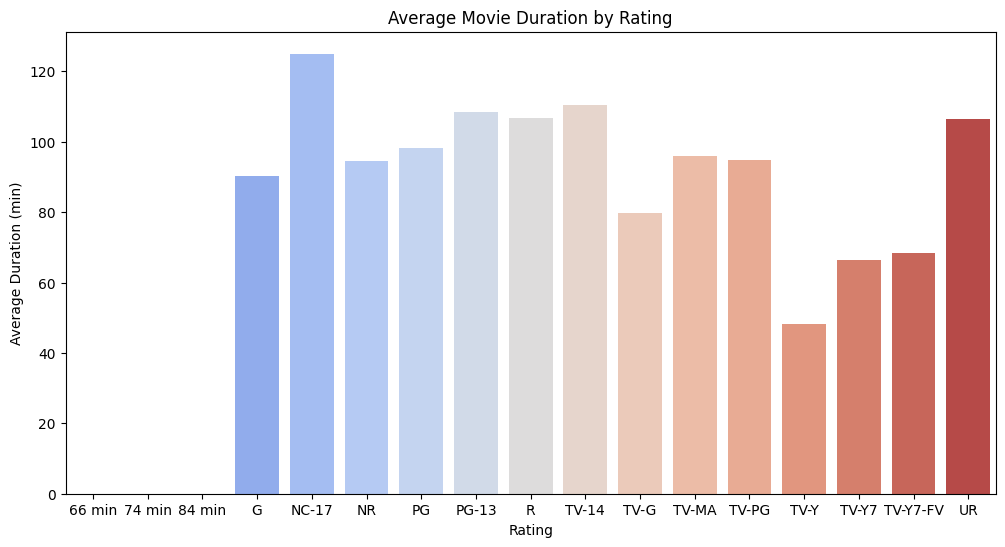

In [48]:
# Plot average duration by rating

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_duration_by_rating, x='rating', y='duration', palette='coolwarm')
plt.title('Average Movie Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Duration (min)')
plt.show()

In [35]:
#5. What are the most common ratings, and how are they distributed across different types of content?

rating_count = data['rating'].value_counts().reset_index()
rating_count.columns = ['rating', 'count']


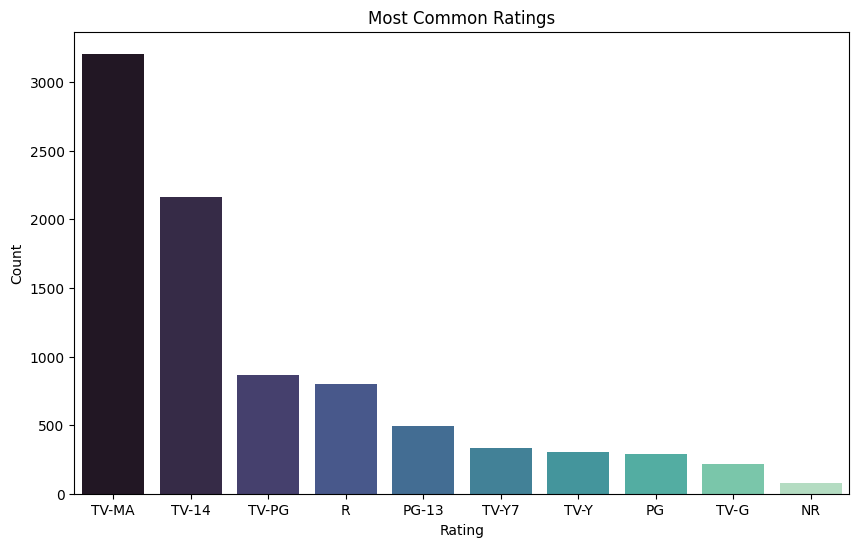

In [38]:
# Plot most common ratings

plt.figure(figsize=(10, 6))
sns.barplot(data=rating_count.head(10), x='rating', y='count', palette='mako')
plt.title('Most Common Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

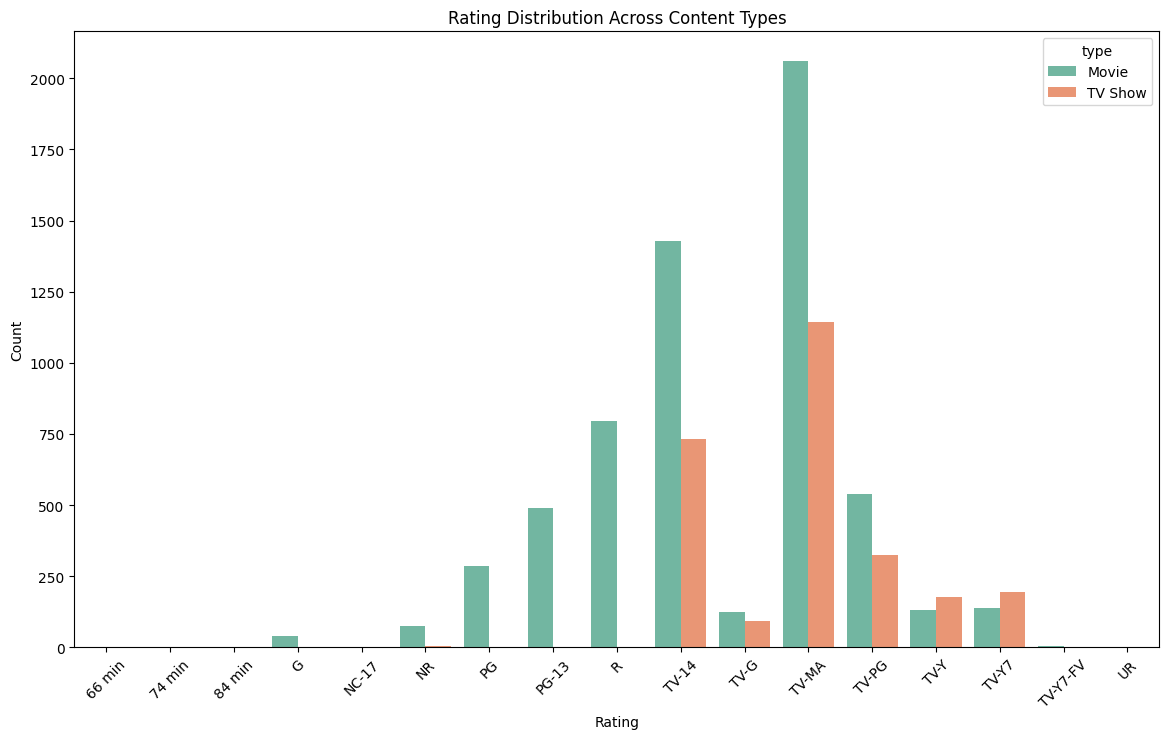

In [51]:
# Distribution of ratings across content types

rating_by_type = data.groupby(['type', 'rating']).size().reset_index(name='count')
plt.figure(figsize=(14, 8))
sns.barplot(data=rating_by_type, x='rating', y='count', hue='type', dodge=True, palette='Set2')
plt.title('Rating Distribution Across Content Types')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [52]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [53]:
print(data.describe())


       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [54]:
data.isna().sum().mode()

,0
0,0


In [55]:
data.isna().sum().median()

0.0

In [56]:
data.isna().sum().mean()

289.6666666666667

In [58]:
data.isna().sum().std()

775.2902486791446

In [59]:
data.isna().sum().var()

601074.9696969698

In [60]:
data.shape

(8807, 12)

In [65]:
# Calculate the correlation between columns with missing values
correlation_matrix = data.isna().corr()

# Display the correlation matrix
print(correlation_matrix)




              show_id  type  title  director      cast  country  date_added  \
show_id           NaN   NaN    NaN       NaN       NaN      NaN         NaN   
type              NaN   NaN    NaN       NaN       NaN      NaN         NaN   
title             NaN   NaN    NaN       NaN       NaN      NaN         NaN   
director          NaN   NaN    NaN  1.000000  0.089588      NaN    0.051615   
cast              NaN   NaN    NaN  0.089588  1.000000      NaN   -0.010839   
country           NaN   NaN    NaN       NaN       NaN      NaN         NaN   
date_added        NaN   NaN    NaN  0.051615 -0.010839      NaN    1.000000   
release_year      NaN   NaN    NaN       NaN       NaN      NaN         NaN   
rating            NaN   NaN    NaN  0.020994 -0.006853      NaN   -0.000719   
duration          NaN   NaN    NaN -0.012058 -0.005935      NaN   -0.000622   
listed_in         NaN   NaN    NaN       NaN       NaN      NaN         NaN   
description       NaN   NaN    NaN       NaN       N

In [66]:
covariance_matrix = data.isna().cov()

# Display the covariance matrix
print(covariance_matrix)

              show_id  type  title  director      cast  country    date_added  \
show_id           0.0   0.0    0.0  0.000000  0.000000      0.0  0.000000e+00   
type              0.0   0.0    0.0  0.000000  0.000000      0.0  0.000000e+00   
title             0.0   0.0    0.0  0.000000  0.000000      0.0  0.000000e+00   
director          0.0   0.0    0.0  0.209655  0.011953      0.0  7.959570e-04   
cast              0.0   0.0    0.0  0.011953  0.084910      0.0 -1.063769e-04   
country           0.0   0.0    0.0  0.000000  0.000000      0.0  0.000000e+00   
date_added        0.0   0.0    0.0  0.000796 -0.000106      0.0  1.134300e-03   
release_year      0.0   0.0    0.0  0.000000  0.000000      0.0  0.000000e+00   
rating            0.0   0.0    0.0  0.000205 -0.000043      0.0 -5.157667e-07   
duration          0.0   0.0    0.0 -0.000102 -0.000032      0.0 -3.868250e-07   
listed_in         0.0   0.0    0.0  0.000000  0.000000      0.0  0.000000e+00   
description       0.0   0.0 

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [74]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [76]:
data['duration'].mode()

,duration
0,1 Season
